# Fastai Implementation

In [1]:
from fastai.vision import ImageDataBunch, cnn_learner, models, ClassificationInterpretation
from fastai.metrics import error_rate

In [2]:
import pathlib
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path: Union[pathlib.Path, str], train: Union[pathlib.Path, str] = 'train', valid: Union[pathlib.Path, str] = 'valid', test: Union[pathlib.Path, str, NoneType] = None, valid_pct=None, seed: int = None, classes: Collection = None, **kwargs: Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [3]:
data = ImageDataBunch.from_folder(path="/Users/jeremynelson/2020/jerms-writing/data/")

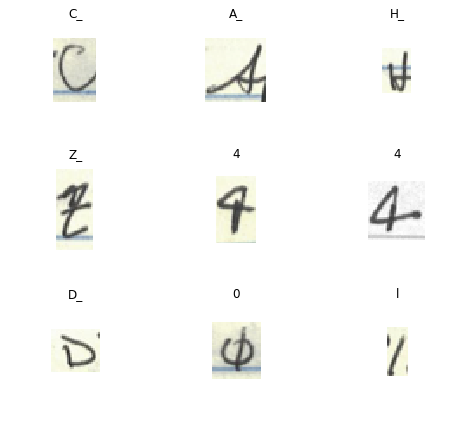

In [4]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
help(models)

Help on package fastai.vision.models in fastai.vision:

NAME
    fastai.vision.models

PACKAGE CONTENTS
    cadene_models
    darknet
    efficientnet
    presnet
    unet
    wrn
    xception
    xresnet
    xresnet2

DATA
    xresnet101 = functools.partial(<function xresnet at 0x1279d4e...ion=4,...
    xresnet152 = functools.partial(<function xresnet at 0x1279d4e...ion=4,...
    xresnet18 = functools.partial(<function xresnet at 0x1279d4e...nsion=1...
    xresnet18_deep = functools.partial(<function xresnet at 0x1279d4e...la...
    xresnet34 = functools.partial(<function xresnet at 0x1279d4e...nsion=1...
    xresnet34_deep = functools.partial(<function xresnet at 0x1279d4e...la...
    xresnet50 = functools.partial(<function xresnet at 0x1279d4e...nsion=4...
    xresnet50_deep = functools.partial(<function xresnet at 0x1279d4e...la...

FILE
    /Users/jeremynelson/2019/py3-env/lib/python3.7/site-packages/fastai/vision/models/__init__.py




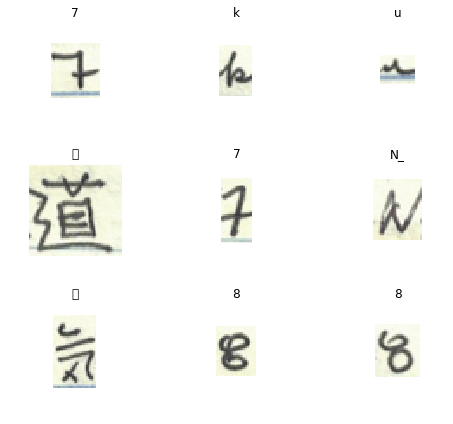

In [7]:
data.show_batch(rows=3, figsize=(7,6))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/jeremynelson/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [9]:
print(data.classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A_', 'B_', 'C_', 'D_', 'E_', 'F_', 'G_', 'H_', 'I_', 'J_', 'K_', 'L_', 'M_', 'N_', 'O_', 'P_', 'Q_', 'R_', 'S_', 'T_', 'U_', 'V_', 'W_', 'X_', 'Y_', 'Z_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '合', '気', '道']


In [10]:
data.c

65

In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,5.637102,4.743344,0.982301,00:58
1,4.543283,4.376510,0.914454,00:47
2,3.635468,4.141025,0.854474,00:46
3,3.006969,4.009847,0.858407,00:47


In [23]:
learn.save("/Users/jeremynelson/2020/jerms-writing/models/02020-03-30-cnn-stage")

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

In [16]:
losses,idxs = interp.top_losses()

In [27]:
len(data.valid_ds)

735

In [28]:
len(losses)

735

In [29]:
len(idxs)

735

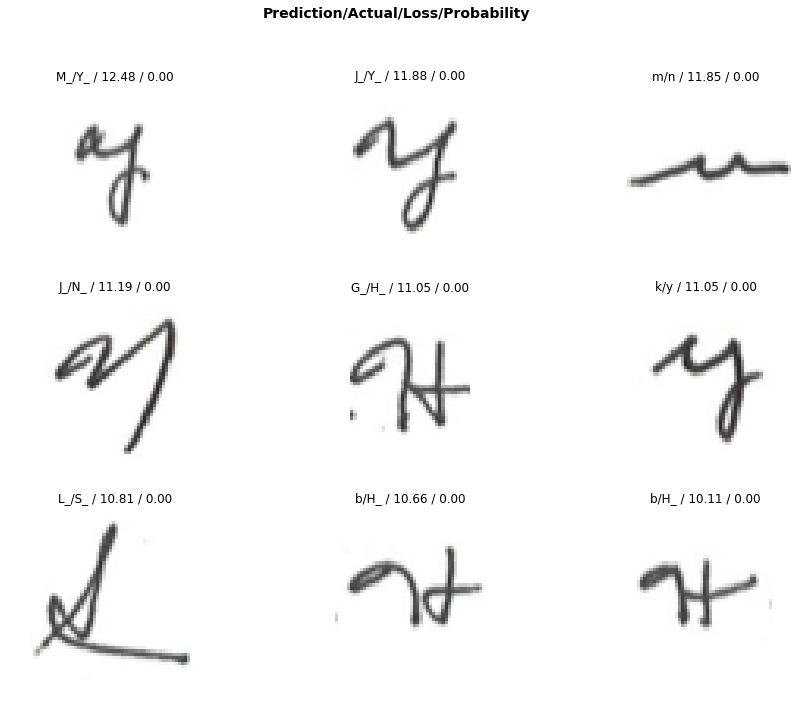

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotl

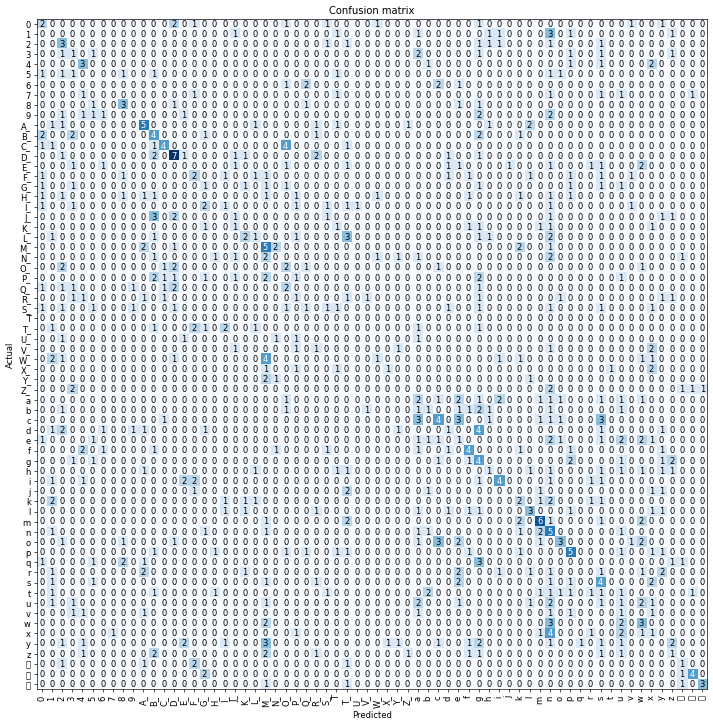

In [33]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
interp.most_confused(min_val=2)

[('C_', 'D_', 7),
 ('O_', 'D_', 5),
 ('c', 'a', 5),
 ('e', 'a', 5),
 ('n', 'm', 5),
 ('o', 'c', 5),
 ('w', 'n', 5),
 ('D_', 'B_', 4),
 ('N_', 'n', 4),
 ('Q_', 'B_', 4),
 ('f', 't', 4),
 ('l', 'S_', 4),
 ('o', 'D_', 4),
 ('q', 'g', 4),
 ('s', 'a', 4),
 ('u', 'n', 4),
 ('x', 'n', 4),
 ('y', 'n', 4),
 ('0', 'D_', 3),
 ('2', 'n', 3),
 ('4', 's', 3),
 ('9', 'g', 3),
 ('A_', '4', 3),
 ('E_', 'O_', 3),
 ('J_', 'B_', 3),
 ('K_', 'n', 3),
 ('K_', 't', 3),
 ('L_', 'B_', 3),
 ('L_', 't', 3),
 ('O_', 'Q_', 3),
 ('P_', 'D_', 3),
 ('R_', 'D_', 3),
 ('T_', 'I_', 3),
 ('a', 's', 3),
 ('b', 'g', 3),
 ('d', '2', 3),
 ('d', '3', 3),
 ('e', 'c', 3),
 ('e', 'o', 3),
 ('k', 'l', 3),
 ('k', 'n', 3),
 ('m', 'n', 3),
 ('p', 't', 3),
 ('r', 'n', 3),
 ('t', 'l', 3),
 ('u', 'w', 3),
 ('v', 'n', 3),
 ('w', 'm', 3),
 ('z', 'M_', 3),
 ('0', 'O_', 2),
 ('1', 'n', 2),
 ('3', '2', 2),
 ('3', 'g', 2),
 ('5', '8', 2),
 ('8', 'Q_', 2),
 ('8', 'g', 2),
 ('9', '5', 2),
 ('A_', 'B_', 2),
 ('A_', 'F_', 2),
 ('B_', 'Q_', 2),
 

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.803496,4.754030,0.882993,00:43


In [48]:
learn.load("/home/jpnelson/2020/jerms-writing/models/02020-03-26-cnn-stage")

Learner(data=ImageDataBunch;

Train: LabelList (1088 items)
x: ImageList
Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56)
y: CategoryList
Z_,Z_,Z_,Z_,Z_
Path: /home/jpnelson/2020/jerms-writing/data;

Valid: LabelList (735 items)
x: ImageList
Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56)
y: CategoryList
Z_,Z_,Z_,Z_,Z_
Path: /home/jpnelson/2020/jerms-writing/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


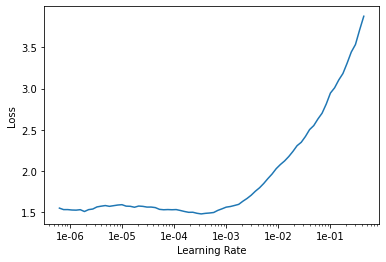

In [42]:
learn.recorder.plot()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(.0006,.0004))

epoch,train_loss,valid_loss,error_rate,time
0,2.209613,2.888949,0.725664,01:07
1,1.861563,3.136945,0.718781,01:08
2,1.776848,3.267627,0.734513,01:08
3,1.712181,3.285409,0.742380,01:08
4,1.501004,2.444894,0.566372,01:12
5,1.256942,2.144321,0.520157,01:15
6,0.978161,2.009043,0.470010,01:11
7,0.741063,1.958008,0.445428,01:10
8,0.562055,1.945164,0.441495,01:11
9,0.430875,1.949935,0.432645,01:11



# Use resnet50

In [21]:
learnResnet50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/jeremynelson/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [22]:
learnResnet50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


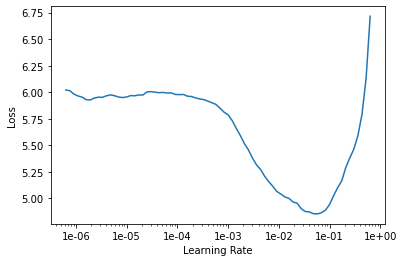

In [47]:
learnResnet50.recorder.plot()

In [24]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.091941,1.863958,0.411013,01:15
1,0.077290,2.057694,0.441495,01:09
2,0.118730,2.766375,0.538840,01:11
3,0.275536,2.823207,0.552606,01:12


KeyboardInterrupt: 

In [25]:
learnResnet50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,5.630403,7.237279,0.978368,01:18
1,4.340786,5.945266,0.941003,01:16
2,3.387189,4.480571,0.875123,01:24
3,2.598804,4.276530,0.860374,01:18
4,2.030238,4.280889,0.855457,01:18
5,1.602945,4.253202,0.841691,01:19
6,1.273919,4.203588,0.839725,01:20
7,1.038348,4.219752,0.837758,01:18


In [27]:
learnResnet50.save("/Users/jeremynelson/2020/jerms-writing/models/02020-03-31-cnn-res50")

In [28]:
learnResnet50.unfreeze()
learnResnet50.fit_one_cycle(3, max_lr=slice(.0006, .0004))

epoch,train_loss,valid_loss,error_rate,time
0,1.818434,6.269134,0.900688,01:48
1,2.389250,4.425489,0.799410,01:45
2,1.936410,2.942895,0.661750,01:45
